To begin, I would like to record some initial thoughts and hypotheses about the value that could be derived from this dataset. Firstly, due to the nature of the crypto market's exchanges where bitcoin is the seen as the de facto currency and most other coins are bought with bitcoin, I suspect there to be a significant correlation in prices between the various other coins. Furthermore, there is often news or events that affec the market as a whole, since it is dependent on the same regulatory and investment environments. This should add to correlation. 

Ideally, what I want to determine is whether present price can be approached as a function of past price and volume. This is due to basic principles of technical trading. The complexity here is that much of the trading in crypto exchanges was done through agents using such technical analysis, and so maybe the signal was responded to too quickly for any more value to be extracted. 

Finally, we have picked a year where there was a definite long term trend for the prices upon which a successful long term trade can be executed. Thus, the criteria will have to be in comparison to simple long or short across the entire time period. 

In [1]:
from datetime import datetime
import requests

coins = ['btc','eth','ltc', 'xrp', 'bch','eos','bsv','trx','xlm']
coin_dict = {}
for coin in coins:
    url = "https://api.cryptowat.ch/markets/bitfinex/%susd/ohlc" %(coin)
    parameters = {
      'periods':'14400',
        'before':'1561608000',
        'after':'1514764800'
    }
    s = "response_2018_%s" %(coin)
    coin_dict[s] = requests.get(url,params = parameters).json()['result']['14400']

In [2]:
import numpy as np
import pandas as pd

coin_clean_dict = {}

for s in coin_dict.keys():
    coin_array = np.zeros([len(coin_dict[s]),2])
    for j in range(len(coin_dict[s])):
        # price
        coin_array[j][0] = coin_dict[s][j][1]
        # volume
        coin_array[j][1] = coin_dict[s][j][5]
    coin_clean_dict[s] = coin_array

In [3]:
df_coin = pd.DataFrame()
df_coin['Time'] = pd.date_range(freq='4H', start=datetime(2018, 1, 2), periods=3247)
df_coin = df_coin.set_index('Time')


for key in coin_dict.keys():
    df_coin[key[14:] + ' price'] = np.nan
    df_coin[key[14:] + ' volume'] = np.nan
    start = datetime.utcfromtimestamp((coin_dict[key][0][0])).strftime('%Y-%m-%d %H:%M:%S')
    end = datetime.utcfromtimestamp((coin_dict[key][-1][0])).strftime('%Y-%m-%d %H:%M:%S')
    df_coin.loc[start:end,[key[14:]+' price']] = np.transpose(coin_clean_dict[key][:,0]).reshape(len(coin_clean_dict[key][:,0]),1)
    df_coin.loc[start:end,[key[14:]+' volume']] = np.transpose(coin_clean_dict[key][:,1]).reshape(len(coin_clean_dict[key][:,1]),1)

In [4]:
df_coin.head()

,btc price,btc volume,eth price,eth volume,ltc price,ltc volume,xrp price,xrp volume,bch price,bch volume,eos price,eos volume,bsv price,bsv volume,trx price,trx volume,xlm price,xlm volume
Time,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,13249.0,5229.3380,744.49,23007.984,220.89,21830.557,1.8713,18396336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 04:00:00,13374.0,8460.0400,752.88,181643.080,223.51,90096.310,2.0405,25242236.0,2306.5,6201.3960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 08:00:00,13315.0,6468.3545,819.00,62310.586,239.96,41594.062,1.9368,6815049.5,2360.2,4750.7190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 12:00:00,13356.0,4250.0130,843.89,51783.793,240.61,26308.498,1.9825,8185128.5,2340.0,3896.5886,8.190,341294.34,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 16:00:00,13530.0,6493.4634,846.67,54234.156,241.05,65847.160,2.0225,23568560.0,2390.8,9868.8260,7.971,1080932.40,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_coin2 = df_coin.interpolate(limit_direction = 'backward', axis = 0, method='spline', order =3)
df_coin2.head()

,btc price,btc volume,eth price,eth volume,ltc price,ltc volume,xrp price,xrp volume,bch price,bch volume,eos price,eos volume,bsv price,bsv volume,trx price,trx volume,xlm price,xlm volume
Time,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,13249.0,5229.3380,744.49,23007.984,220.89,21830.557,1.8713,18396336.0,1992.663807,-1517.517063,6.634237,-3.411390e+06,1.258350e+10,2.326773e+17,0.046144,-9.862757e+12,0.313510,-3.019752e+12
2018-01-02 04:00:00,13374.0,8460.0400,752.88,181643.080,223.51,90096.310,2.0405,25242236.0,2306.500000,6201.396000,6.771283,-2.173305e+06,1.256373e+10,2.323116e+17,0.046167,-9.650037e+12,0.313596,-3.007080e+12
2018-01-02 08:00:00,13315.0,6468.3545,819.00,62310.586,239.96,41594.062,1.9368,6815049.5,2360.200000,4750.719000,6.906498,-8.329306e+05,1.254398e+10,2.319463e+17,0.046191,-9.440398e+12,0.313682,-2.994445e+12
2018-01-02 12:00:00,13356.0,4250.0130,843.89,51783.793,240.61,26308.498,1.9825,8185128.5,2340.000000,3896.588600,8.190000,3.412943e+05,1.252425e+10,2.315814e+17,0.046214,-9.233817e+12,0.313767,-2.981844e+12
2018-01-02 16:00:00,13530.0,6493.4634,846.67,54234.156,241.05,65847.160,2.0225,23568560.0,2390.800000,9868.826000,7.971000,1.080932e+06,1.250454e+10,2.312168e+17,0.046238,-9.030271e+12,0.313852,-2.969279e+12


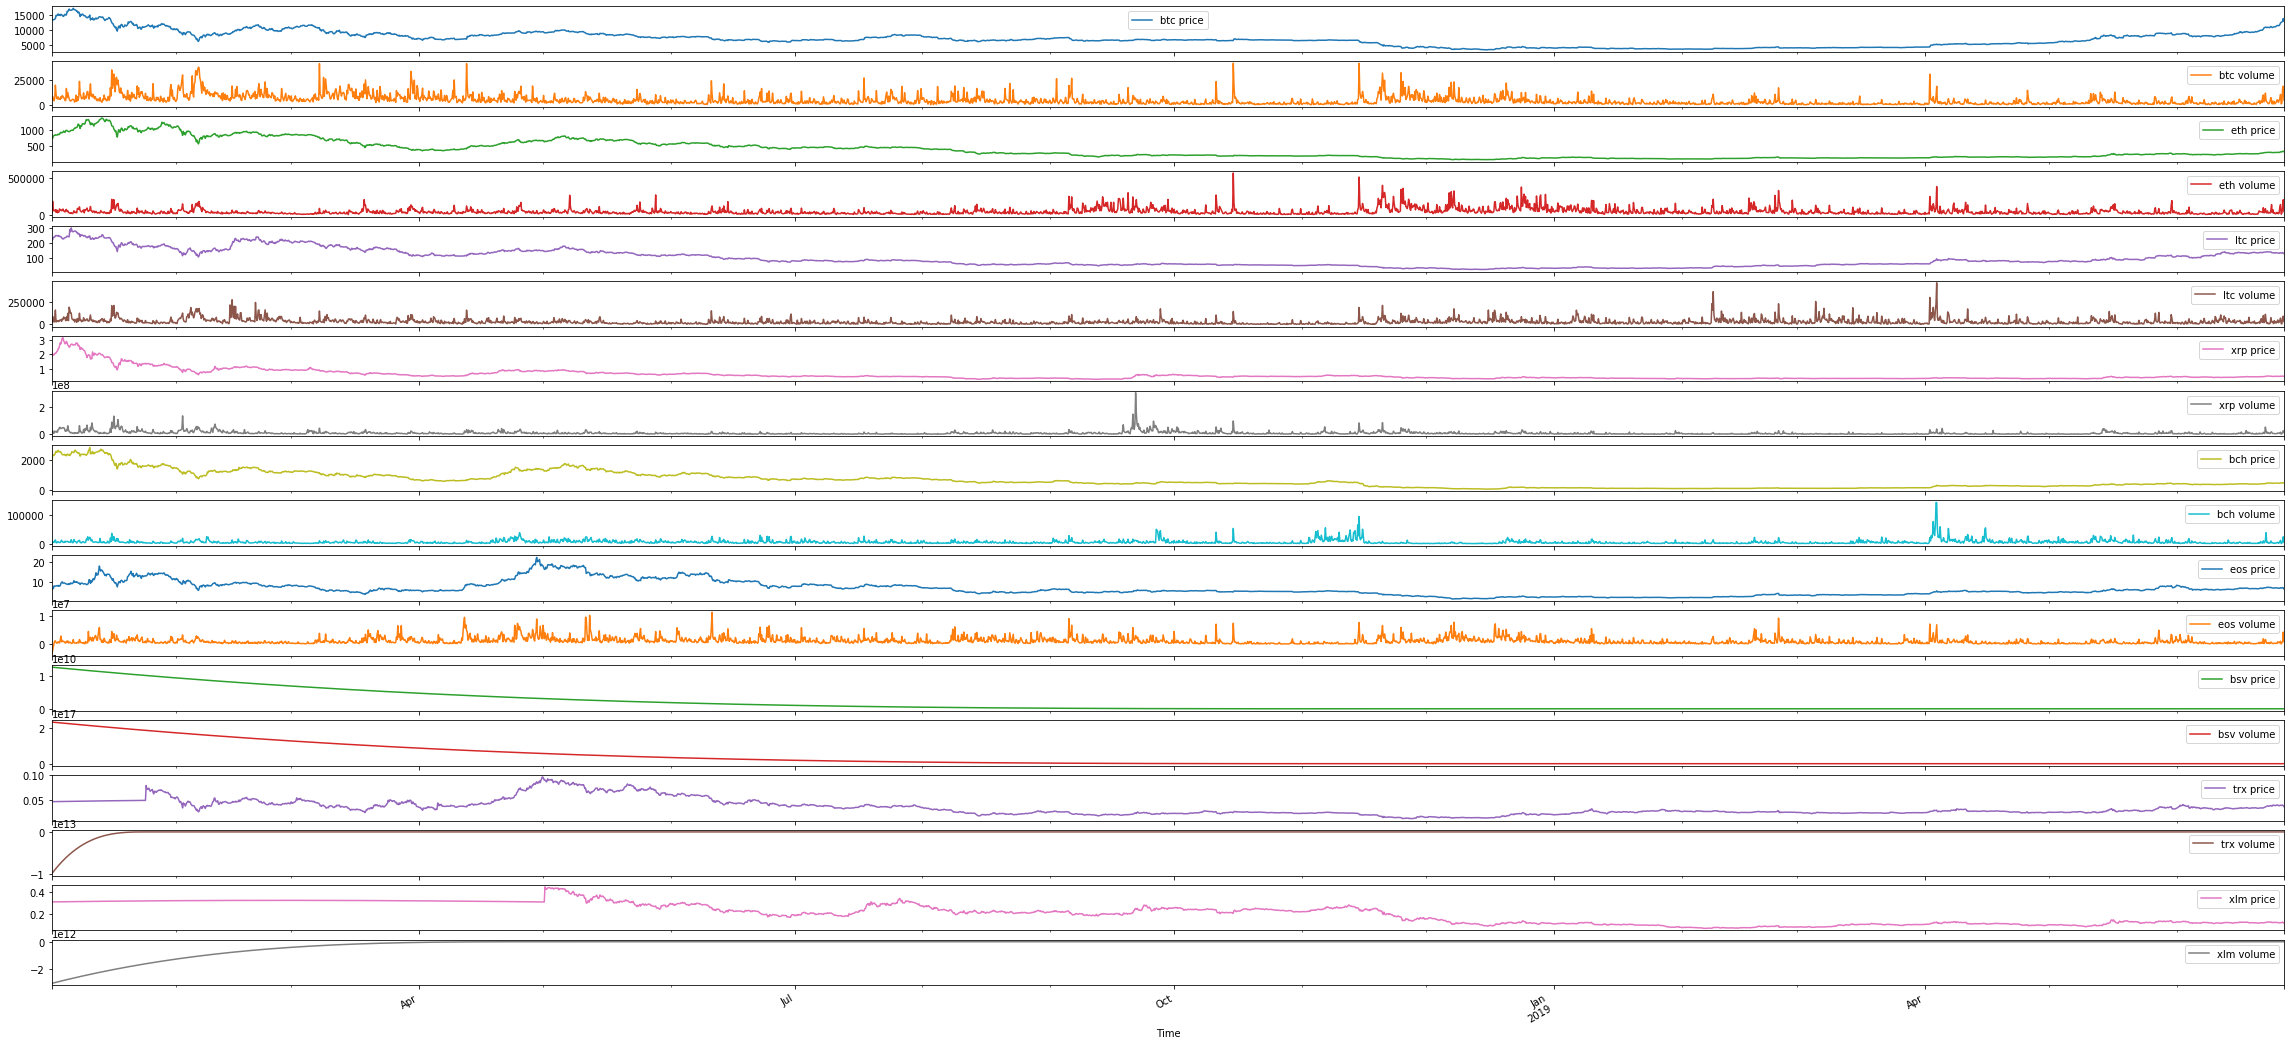

In [7]:
import matplotlib.pyplot as plt

df_coin2.plot(subplots = True, figsize=(40,20))
plt.show()

The Spline approach to filling the NaN values was ineffective for the last 3 cryptocurrencies, which will be dropped. 

In [6]:
df_coin2 = df_coin2.drop(columns=['bsv price','bsv volume', 'trx price', 'trx volume', 'xlm price', 'xlm volume'])

NameError: name 'plt' is not defined

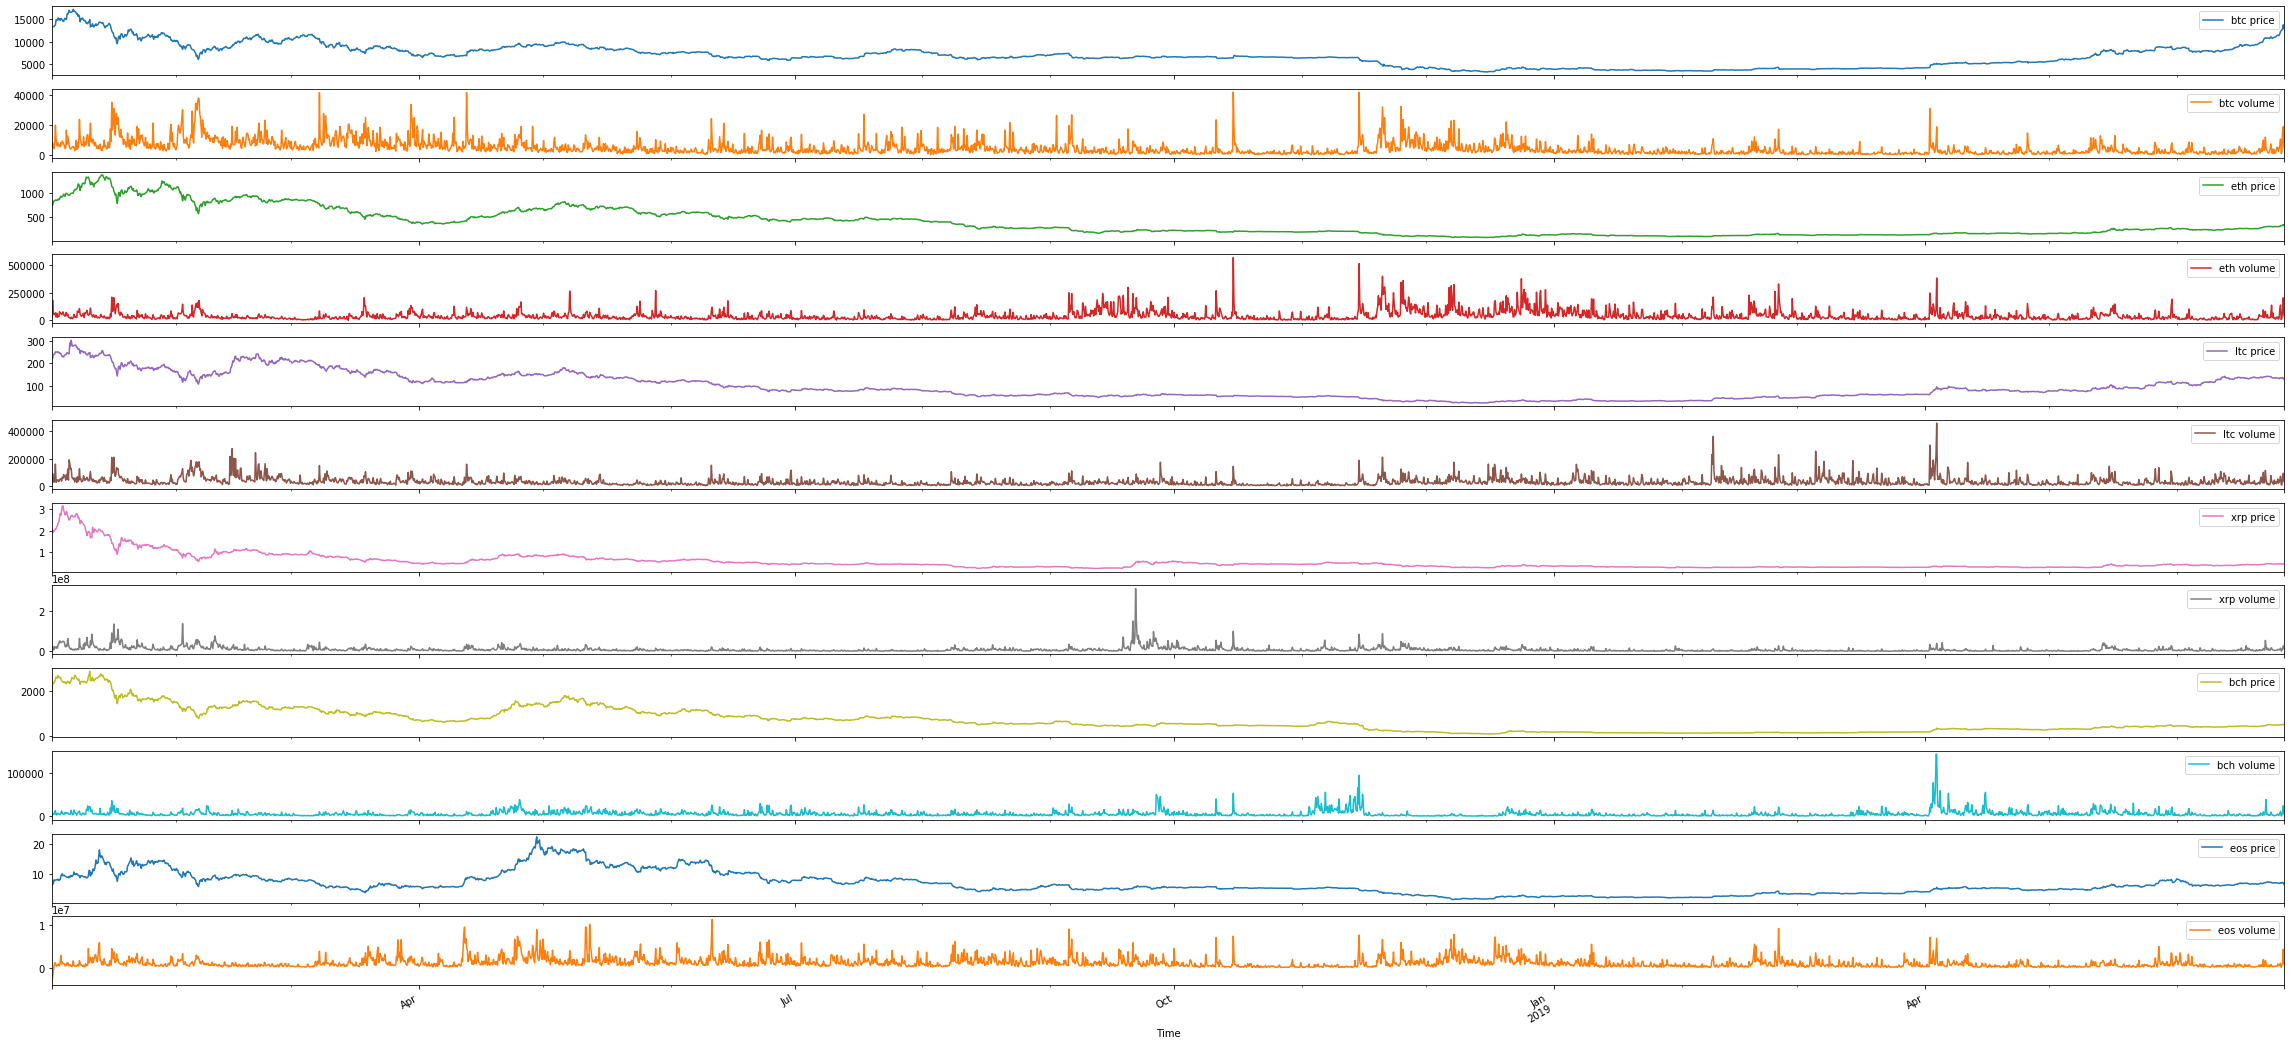

In [8]:
df_coin2.plot(subplots = True, figsize=(40,20))
plt.show()

One thing to note regarding the trend of the cryptocurrency prices is the overall dominant trend of prices being elevated for all currencies in the beginning dipping with lows around the beginning of 2019 and then rising once again. 

In [9]:
even = [2*i for i in range(6)]
odd = [2*i + 1 for i in range(6)]

In [10]:
df_prices = df_coin2.iloc[:,even]
df_volumes = df_coin2.iloc[:,odd]

In [11]:
import numpy as np

df_prices_return = df_prices.pct_change()[1:]
# df_prices_return.head()

In [12]:
df_prices_log_return = np.log(1 + df_prices_return)
# df_prices_log_return.head()

In [13]:
import scipy.stats as stats

print("Pearson Overall Correlation", df_prices_log_return.corr().iloc[0,1])

Pearson Overall Correlation 0.8107396639850863


In [14]:
def crosscorr(datax, datay, lag=0):
    output = datax.corr(datay.shift(lag))
    return output

d1 = df_prices_log_return['btc price']
d2 = df_prices_log_return['eth price']
rs = [crosscorr(d1,d2, lag) for lag in range(-18,18)]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
print(offset)

## This shows that there is no directionality to the correlation, meaning one series does not follow another. 
## The maximum correlation is still when there is no shift between time series. 

0.0


In [103]:
for symbol in df_volumes.columns.tolist():
    min_vol = df_volumes[symbol].min()
    max_vol = df_volumes[symbol].max()
    df_volumes[symbol] = (df_volumes[symbol] - min_vol)/ (max_vol - min_vol)
    
df_volumes = df_volumes[1:]

/Users/omarrizkallah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


This is the end of the data story part of the project. At this point, there are several things to note. First, the overall holistici trend we seen over all of our currencies which means there is merit in considering a type of learning algorithm that is able to incorporate past data on the currency itself as well as a hollistic aggregator of the market at large. Also, we will need to incorporate some measure of risk of a position as the level of change over both short and long terms are large enough that caution must be exercised when receving signals